In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv("NFdata1415.csv")
print(df.shape)
print(df.head())

(1415, 42)
   age  gender  fever  tachy  tpnea  hypo  wound  sea  animal  farm   ...  \
0   64       0      0      0      0     1      1    1       1      1  ...   
1   38       1      0      1      0     0      0    1       1      0  ...   
2   43       1      1      1      0     0      1    1       0      0  ...   
3   72       1      0      1      0     0      1    1       0      0  ...   
4   42       1      0      0      0     0      0    1       0      0  ...   

      crp   seg    hb    cr    k   alt  band  season  site  nf  
0   26.38  91.5  13.5  1.57  3.0  38.0   8.0       S     L   1  
1  174.27  83.0  16.3  0.80  3.7  34.0   2.0       S     U   1  
2    1.94  60.0  13.6  1.36  5.2  33.0   2.0       S     L   1  
3  191.54  88.8  14.0  1.06  4.4  39.0   0.0       S     U   1  
4  137.31  79.5  10.4  2.47  3.5  20.0   7.0       S     U   1  

[5 rows x 42 columns]


In [2]:
print(df["nf"].value_counts())
print("  ")

nonNFCount, c_counter = df[df["nf"]==0].shape
print("nonNF record count = %d" %nonNFCount)
nfCount, c_counter = df[df["nf"]==1].shape
print("NF record count = %d" %nfCount)
print("  ")

0    1241
1     174
Name: nf, dtype: int64
  
nonNF record count = 1241
NF record count = 174
  


In [3]:
mask = df["nf"]==1      #記錄NF的資料
dfA = df[mask]				#指定訓練資料
dfB = df[~mask]

column_headers = list(df.columns)
for i in range(28,39):
  #Perform two-sided Mann-Whitney U test (Two columns do not have equal medians).
  uStatistic, p_value = stats.mannwhitneyu(x=dfA[column_headers[i]], y=dfB[column_headers[i]], alternative="two-sided")
  print("%s p-value = %.8f" %(column_headers[i],p_value))

wbc p-value = 0.00000000
plt p-value = 0.00000019
sodium p-value = 0.00002783
sugar p-value = 0.09709624
crp p-value = 0.00000000
seg p-value = 0.00000000
hb p-value = 0.75334620
cr p-value = 0.00002042
k p-value = 0.04378075
alt p-value = 0.00112826
band p-value = 0.00000000


In [5]:
dfA = pd.read_csv("NF186-174.csv")
dfB = pd.read_csv("cellulitis1467-1241.csv")
uStatistic, p_value = stats.mannwhitneyu(x=dfA["LOS"], y=dfB["LOS"], alternative="two-sided")
print("LOS p-value = %.8f" %p_value)


LOS p-value = 0.00000000


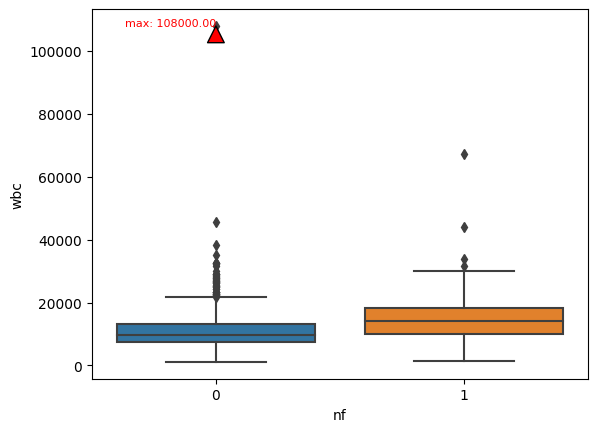

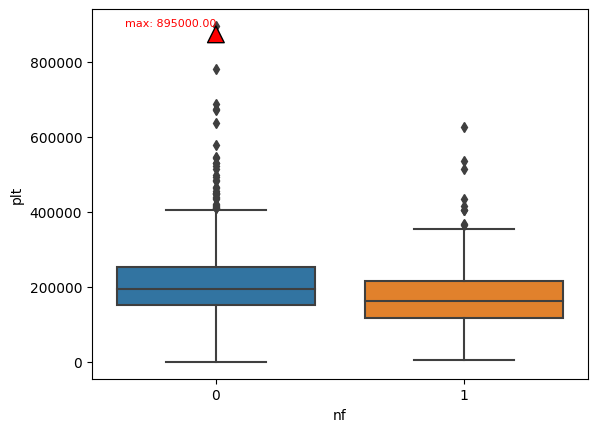

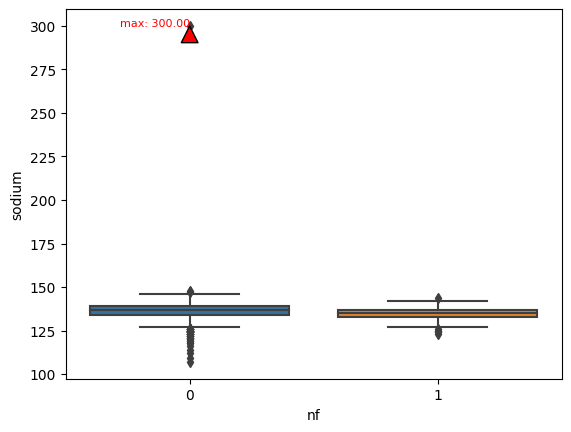

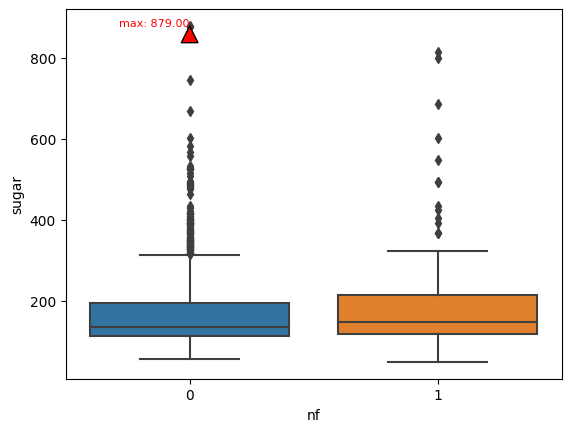

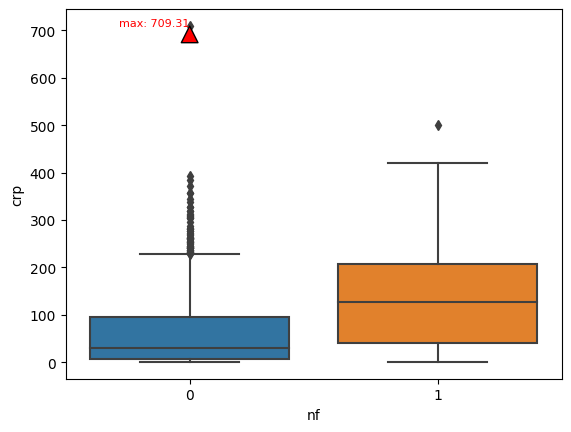

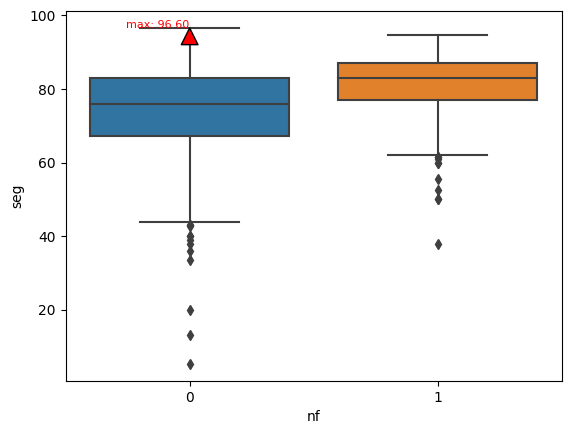

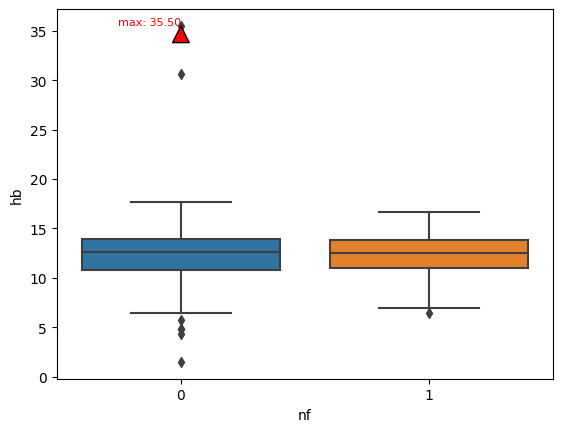

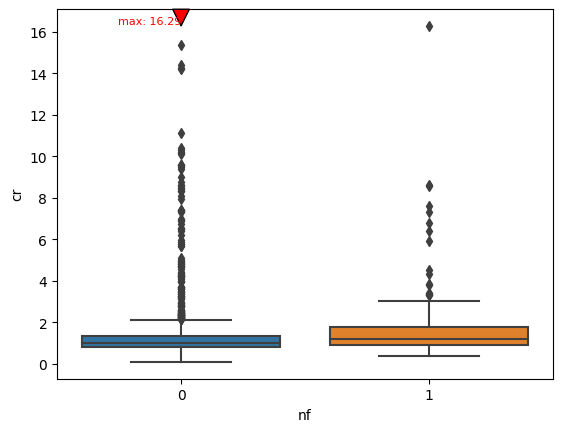

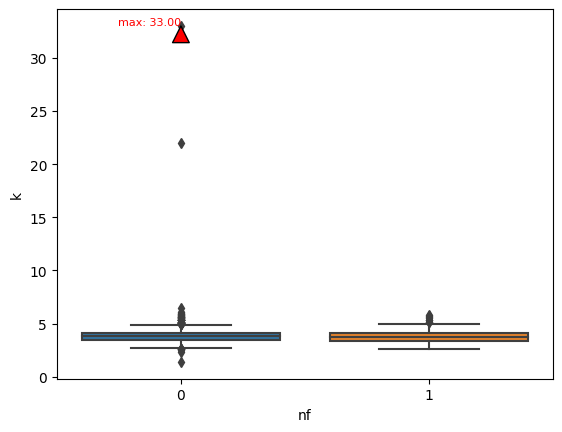

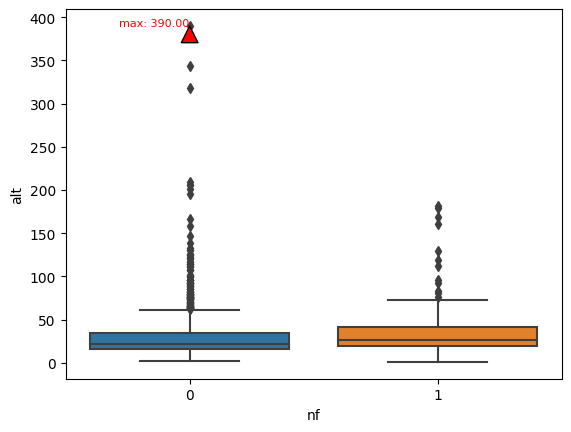

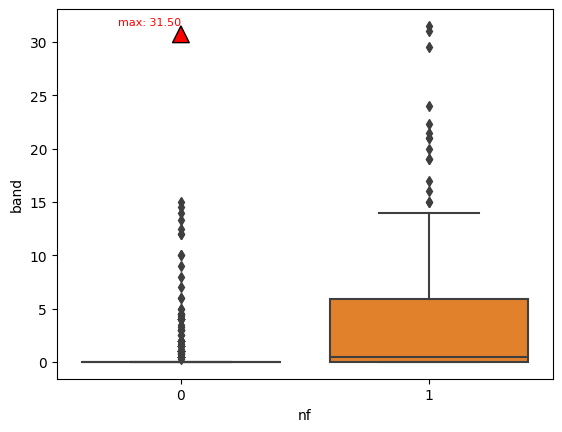

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("NFdata1415.csv")
column_headers = list(df.columns)
max_values=[]
for i in range(28,39):
  sns.boxplot(x="nf", y=column_headers[i], data=df)
  max_val = df[column_headers[i]].max()
    # 將最大值添加到列表中
  max_values.append(max_val)
  plt.annotate("max: {:.2f}".format(max_val), xy=(0, max_val), xytext=(0, max_val+0.1), ha='right', color='red', fontsize=8, arrowprops=dict(facecolor='red', shrink=0.05))
  plt.show()

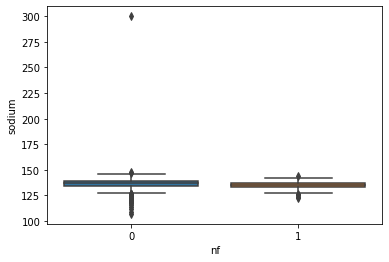

In [6]:
sns.boxplot(x="nf", y="sodium", data=df)

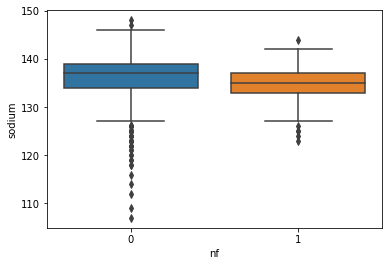

In [7]:
mask = df["sodium"]< 200      #記錄NF的資料
dfSodium = df[mask]				#指定訓練資料
sns.boxplot(x="nf", y="sodium", data=dfSodium)

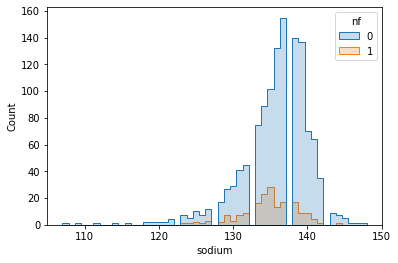

In [8]:
#sns.distplot(dfSodium['sodium'], bins=20)
sns.histplot(dfSodium, x="sodium", hue="nf",element="step")

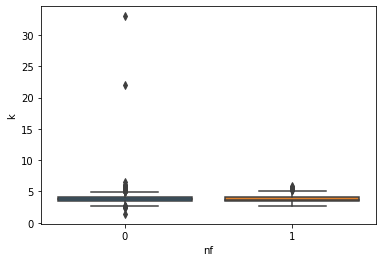

In [9]:
sns.boxplot(x="nf", y="k", data=df)

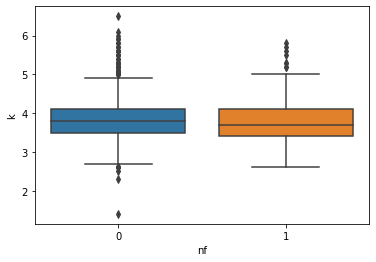

In [10]:
mask = df["k"]< 15      #記錄NF的資料
dfK = df[mask]				#指定訓練資料
sns.boxplot(x="nf", y="k", data=dfK)

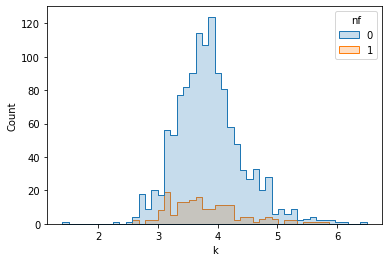

In [11]:
sns.histplot(dfK, x="k", hue="nf",element="step")